# image Classification using CNN

# import required libraries

In [1]:
# import the necessary packages
import pandas as pd
import numy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os


# Load the data and preprocess the input images

In [19]:
imagePaths =list(paths.list_images('C:/Users/haiva/Downloads/natural_images'))
data = []
labels = []

# loop over the image paths
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]

# load the input image (224x224) and preprocess it
    image = load_img(imagePath, target_size=(32, 32))
    image = img_to_array(image)
    image = preprocess_input(image)

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)

In [20]:
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [21]:
data.shape

(6899, 32, 32, 3)

In [22]:
labels.shape

(6899,)

In [23]:
#stadardizing the input data
x_data = data.astype('float32')/255

In [24]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(labels)
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [25]:
#lets shuffle all the data we have:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

# split the data set into 80:20 ratio

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


# Apply CNN model

In [27]:
#structuring the CNN model
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [29]:
#let's compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [30]:
#fitting the model
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

Epoch 1/50
138/138 [==============================] - 3s 25ms/step - loss: 1.8035 - accuracy: 0.3287 - val_loss: 1.3028 - val_accuracy: 0.5399
Epoch 2/50
138/138 [==============================] - 3s 21ms/step - loss: 1.1818 - accuracy: 0.5771 - val_loss: 0.9830 - val_accuracy: 0.6639
Epoch 3/50
138/138 [==============================] - 3s 22ms/step - loss: 0.9806 - accuracy: 0.6496 - val_loss: 0.8413 - val_accuracy: 0.7038
Epoch 4/50
138/138 [==============================] - 3s 22ms/step - loss: 0.8676 - accuracy: 0.6840 - val_loss: 0.7456 - val_accuracy: 0.7373
Epoch 5/50
138/138 [==============================] - 3s 22ms/step - loss: 0.7882 - accuracy: 0.7085 - val_loss: 0.7005 - val_accuracy: 0.7409
Epoch 6/50
138/138 [==============================] - 3s 24ms/step - loss: 0.7365 - accuracy: 0.7336 - val_loss: 0.6822 - val_accuracy: 0.7500
Epoch 7/50
138/138 [==============================] - 4s 26ms/step - loss: 0.6783 - accuracy: 0.7431 - val_loss: 0.6391 - val_accuracy: 0.7790

# display the acuuracy and loss 

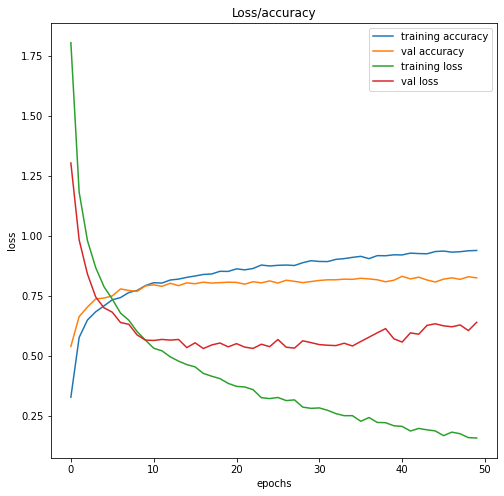

In [31]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


# get prediction on test data

In [32]:
Y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
#converting over Y test to actual labels.
Y_test = np.argmax(Y_test, axis = 1)

# print accuracy for test data

In [34]:
from sklearn.metrics import accuracy_score
print('the accuracy obtained on the test set is:', accuracy_score(Y_pred,Y_test))

the accuracy obtained on the test set is: 0.836231884057971


# print classification report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       151
           1       0.91      0.88      0.89       202
           2       0.70      0.59      0.64       177
           3       0.55      0.60      0.58       144
           4       0.75      0.67      0.71       164
           5       0.96      1.00      0.98       186
           6       0.87      0.94      0.90       147
           7       0.98      0.99      0.98       209

    accuracy                           0.84      1380
   macro avg       0.82      0.83      0.82      1380
weighted avg       0.83      0.84      0.83      1380



In [36]:
print((Y_test, Y_pred))

(array([2, 2, 5, ..., 0, 5, 7], dtype=int64), array([2, 1, 5, ..., 0, 5, 7], dtype=int64))


# make data frame for train and test data

In [44]:
import pandas as pd
pred=pd.DataFrame(Y_test,columns=["test"])
pred["predctions"]=Y_pred


In [61]:
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

In [ ]:
dictionary ={0 :"airplane" , 1 : "car", 2 : "cat",3:"dog",4:"flower",5:"fruit",6:"motorbike",7:"person"} 

In [64]:
pred['original'] = pred['test'].apply(set_value, args =(dictionary, )) 
pred['Predicated'] = pred['predctions'].apply(set_value, args =(dictionary, )) 

In [65]:
pred

,test,predctions,original,Predicated
0,2,2,cat,cat
1,2,1,cat,car
2,5,5,fruit,fruit
3,5,5,fruit,fruit
4,6,6,motorbike,motorbike
...,...,...,...,...
1375,6,6,motorbike,motorbike
1376,5,5,fruit,fruit
1377,0,0,airplane,airplane
1378,5,5,fruit,fruit


In [68]:
result=pred.iloc[:,[2,3]]

In [69]:
result[1:20]

,original,Predicated
1,cat,car
2,fruit,fruit
3,fruit,fruit
4,motorbike,motorbike
5,airplane,airplane
6,motorbike,motorbike
7,person,person
8,fruit,fruit
9,flower,cat
10,flower,flower


# save the model

In [73]:
model.save('model_cnn.h5')